In [ ]:
# strategy, popsize, recombination, tol

При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42,  strategy='best2bin')
result

             message: Optimization terminated successfully.
             success: True
                 fun: 4.440892098500626e-16
                   x: [ 0.000e+00  0.000e+00]
                 nit: 162
                nfev: 4953
          population: [[ 0.000e+00  0.000e+00]
                       [ 0.000e+00  0.000e+00]
                       ...
                       [ 0.000e+00  0.000e+00]
                       [ 0.000e+00  0.000e+00]]
 population_energies: [ 4.441e-16  4.441e-16 ...  4.441e-16  4.441e-16]

**TOL**

In [ ]:
nit_list = []
tol = np.arange(0, 1.1, 0.1)
for i in tol:
    result = differential_evolution(ackley, bounds, seed=42,  tol=i).nit
    nit_list.append(result)
nit_list

[96, 96, 96, 96, 1, 1, 1, 1, 1, 1, 1]

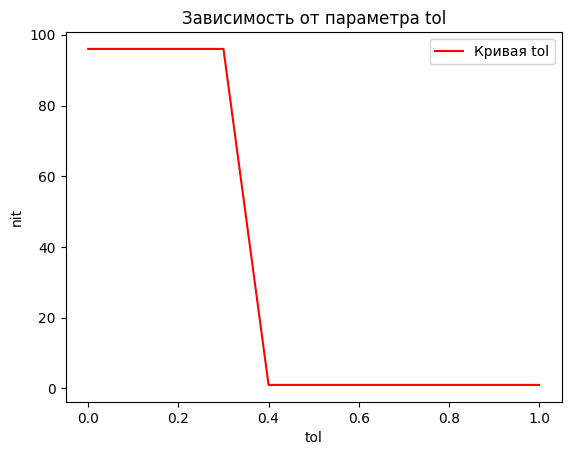

In [ ]:
plt.plot(tol, nit_list, label = 'Кривая tol', color='r');
plt.xlabel('tol')
plt.ylabel('nit')
plt.legend()
plt.title('Зависимость от параметра tol')
plt.show()

**STRATEGY**

In [ ]:
str_strategy = 'best1bin', 'best1exp', 'rand1bin', 'rand1exp', 'rand2bin', 'rand2exp', 'randtobest1bin', 'randtobest1exp', 'currenttobest1bin', 'currenttobest1exp', 'best2exp', 'best2bin'

In [ ]:
nit_strategy = []
param_strategy = []
for i in str_strategy:
  res = differential_evolution(ackley, bounds, seed=42, strategy=i).nit
  nit_strategy.append(res)
  param_strategy.append(i)
nit_strategy

[96, 87, 157, 166, 240, 234, 100, 97, 1000, 1000, 159, 162]

In [ ]:
data_strategy = tuple(zip(param_strategy, nit_strategy))
data_strategy

(('best1bin', 96),
 ('best1exp', 87),
 ('rand1bin', 157),
 ('rand1exp', 166),
 ('rand2bin', 240),
 ('rand2exp', 234),
 ('randtobest1bin', 100),
 ('randtobest1exp', 97),
 ('currenttobest1bin', 1000),
 ('currenttobest1exp', 1000),
 ('best2exp', 159),
 ('best2bin', 162))

In [ ]:
df_strategy = pd.DataFrame(data_strategy, columns=['strategy', 'nit']).sort_values(by='nit', ascending=False)
df_strategy.head()

,strategy,nit
8,currenttobest1bin,1000
9,currenttobest1exp,1000
4,rand2bin,240
5,rand2exp,234
3,rand1exp,166


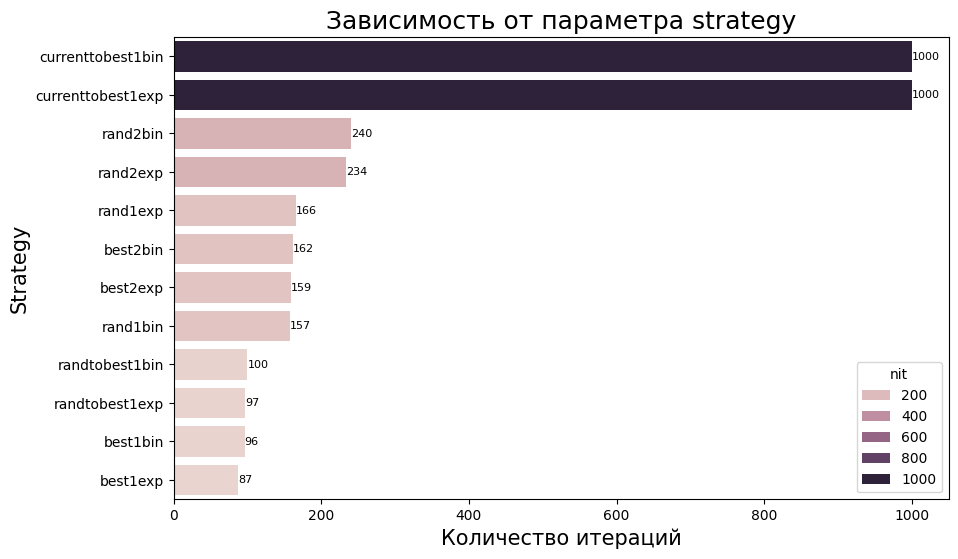

In [ ]:
plt.figure(figsize=[10, 6])
ax = sns.barplot(y='strategy', x='nit', data=df_strategy, hue='nit')  # sns.atplot(kind='bar'....)
for i in ax.containers:
  ax.bar_label(i, size=8)
plt.title('Зависимость от параметра strategy', size=18)
plt.xlabel('Количество итераций', size=15)
plt.ylabel('Strategy', size=15)
plt.show()

**MUTATION**

In [ ]:
mutation = np.arange(0.1, 1.1, 0.1)
mutation

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
list_mutation = []
param_mutation = []
for i in mutation:
  res = differential_evolution(ackley, bounds, seed=42, mutation=i).nit
  list_mutation.append(res)
  param_mutation.append(i)
list_mutation

[16, 30, 37, 45, 56, 72, 91, 109, 132, 165]

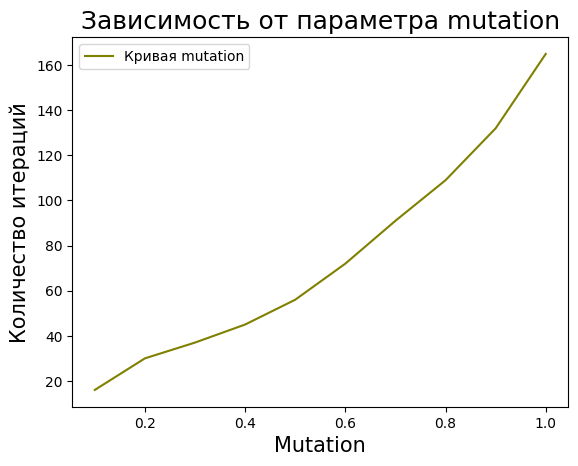

In [ ]:
plt.plot(param_mutation, list_mutation, label = 'Кривая mutation', linewidth = 1.5, color='olive')
plt.xlabel('Mutation', size=15)
plt.ylabel('Количество итераций', size=15)
plt.legend()
plt.title('Зависимость от параметра mutation', size=18)
plt.show()

**POPSIZE**

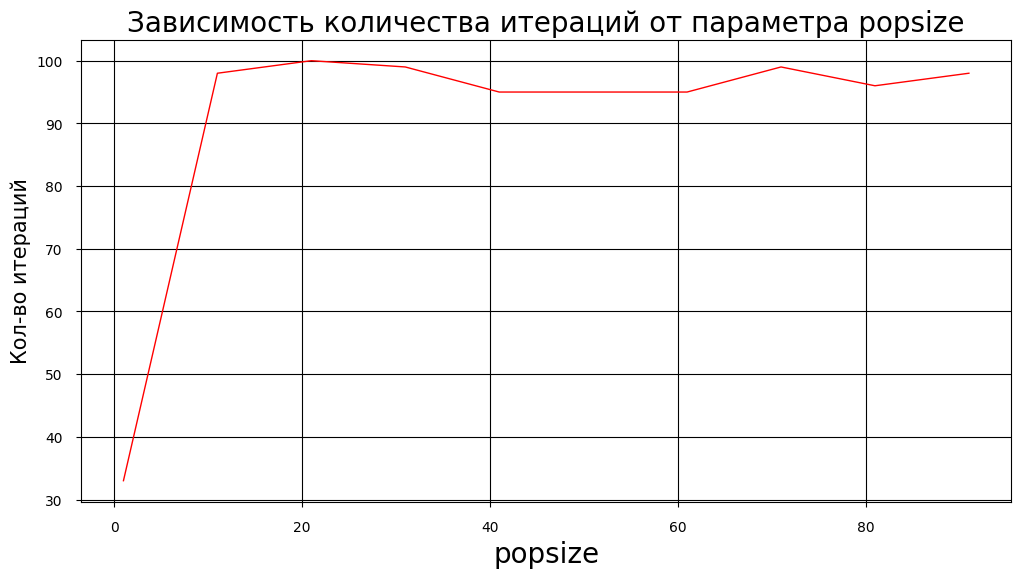

In [ ]:
res  =  []
param  =  []
for  i  in range(1, 100, 10):
    res.append(differential_evolution(ackley,  bounds,  popsize=i,  seed=42 )['nit'])
    param.append(i)

fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра popsize', size=20)
plt.ylabel('Кол-во итераций', size = 15)
plt.xlabel('popsize', size = 20)
plt.show()